# Autoencoder for image debluring

This notebook is based on the following work:
- Github: https://github.com/aswintechguy/Deep-Learning-Projects/tree/main/Autoencoder%20-%20Deep%20CNN
- Youtube: https://www.youtube.com/watch?v=En4dZh51Tic

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist, fashion_mnist
from keras.models import load_model
from math import log10, sqrt
import pandas as pd
import cv2
from skimage.metrics import structural_similarity as ssim

## Load the image number data from the keras datasets

In [17]:
(x_train, _), (x_test, _) = mnist.load_data() # loaded data contains value up to 255

# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [19]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

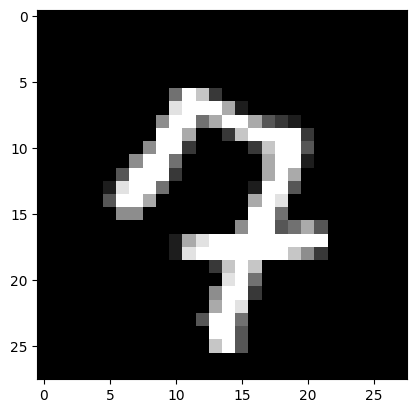

In [6]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Load the fashion dataset

In [25]:
(x_train_fashion, _), (x_test_fashion, _) = fashion_mnist.load_data()

# normalize the image data
x_train_fashion = x_train_fashion.astype('float32')
x_test_fashion = x_test_fashion.astype('float32')

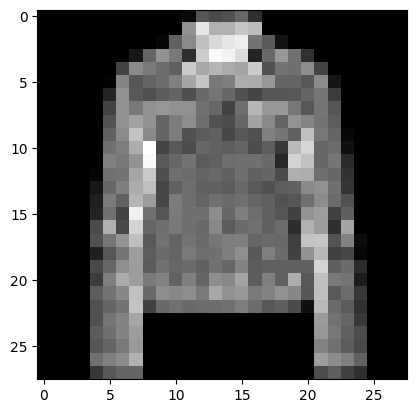

In [27]:
# randomly select input image
index = np.random.randint(len(x_test_fashion))
# plot the image
plt.imshow(x_test_fashion[index].reshape(28,28))
plt.gray()

## Add some noise to the image

In [5]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

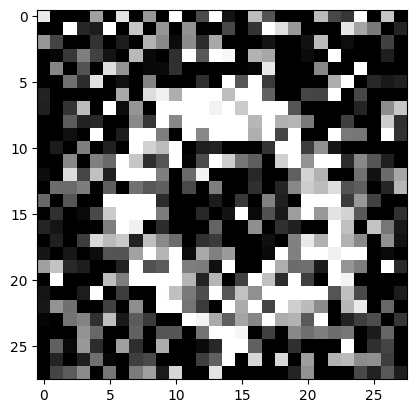

In [6]:
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

## Model creation

In [28]:
# The bellow model was trained on the noisy images and saved in the autoencoder_numbers.keras file
# The training took about 15 minutes on a CPU
model = load_model('./models/autoencoder_numbers.keras')

In [32]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)        0

In [33]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 39s 163ms/step - loss: 0.2274 - val_loss: 0.1531
Epoch 2/20
235/235 [==============================] - 39s 167ms/step - loss: 0.1456 - val_loss: 0.1386
Epoch 3/20
235/235 [==============================] - 42s 177ms/step - loss: 0.1367 - val_loss: 0.1341
Epoch 4/20
235/235 [==============================] - 42s 177ms/step - loss: 0.1319 - val_loss: 0.1287
Epoch 5/20
235/235 [==============================] - 40s 172ms/step - loss: 0.1288 - val_loss: 0.1261
Epoch 6/20
235/235 [==============================] - 42s 177ms/step - loss: 0.1267 - val_loss: 0.1246
Epoch 7/20
235/235 [==============================] - 43s 185ms/step - loss: 0.1250 - val_loss: 0.1229
Epoch 8/20
235/235 [==============================] - 43s 182ms/step - loss: 0.1237 - val_loss: 0.1217
Epoch 9/20
235/235 [==============================] - 43s 184ms/step - loss: 0.1225 - val_loss: 0.1207
Epoch 10/20
235/235 [==============================] - 44s 186ms/step - l

In [42]:
model.save('./models/autoencoder_numbers.keras')

In [8]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 [==============================] - 5s 14ms/step


# Validation
# By visualization

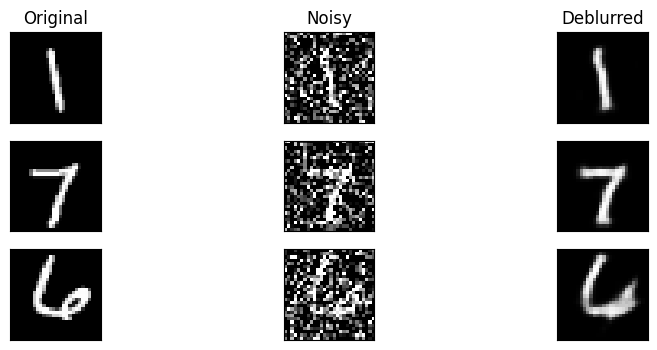

In [30]:
np.random.seed(123)
index = np.random.randint(len(x_test),size=3)
plt.figure(figsize=(10, 4))
# display original image--------------------------------
# 1st row
ax = plt.subplot(3, 3, 1)
plt.imshow(x_test[index[0]].reshape(28,28))
plt.gray()
plt.title('Original')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# 2nd row
ax = plt.subplot(3, 3, 4)
plt.imshow(x_test[index[1]].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# 3rd row
ax = plt.subplot(3, 3, 7)
plt.imshow(x_test[index[2]].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display noisy image -------------------------
# 1st row
ax = plt.subplot(3, 3, 2)
plt.imshow(x_test_noisy[index[0]].reshape(28,28))
plt.gray()
plt.title('Noisy')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# 2nd row
ax = plt.subplot(3, 3, 5)
plt.imshow(x_test_noisy[index[1]].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# 3rd row
ax = plt.subplot(3, 3, 8)
plt.imshow(x_test_noisy[index[2]].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display deblurred image---------------------
# 1st row
ax = plt.subplot(3, 3, 3)
plt.imshow(pred[index[0]].reshape(28,28))
plt.gray()
plt.title('Deblurred')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# 2nd row
ax = plt.subplot(3, 3, 6)
plt.imshow(pred[index[1]].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# 3rd row
ax = plt.subplot(3, 3, 9)
plt.imshow(pred[index[2]].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#------------------------------------------------
plt.show()

In [29]:
pred = model.predict(x_test_fashion)

313/313 [==============================] - 2s 6ms/step


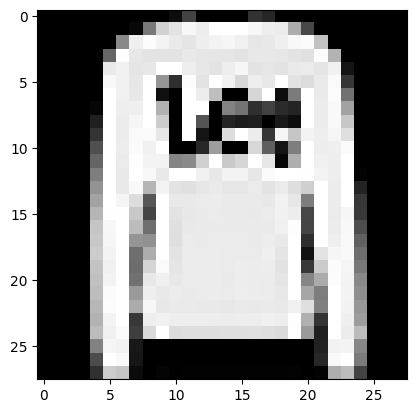

In [30]:
plt.imshow(x_test_fashion[1].reshape(28,28))
plt.gray()

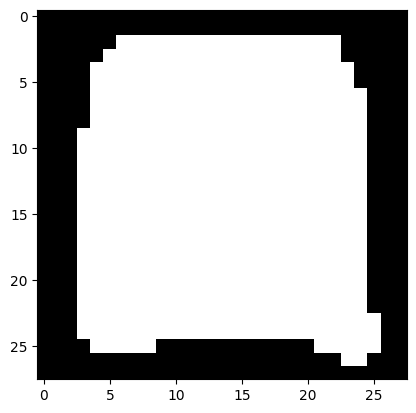

In [31]:
plt.imshow(pred[1].reshape(28,28))
plt.gray()

# By quantitative metrics

Common metrics used for quantitative analysis are PSNR, SSIM, MSE.
https://www.mdpi.com/2076-3417/13/21/12069

One option is to compute the **PSNR** value. PSNR stands for Peak signal-to-noise ratio between the maximum possible power of an image and the power of corrupting noise that affects the quality of its representation. Calculation of the PSNR between identical images, when the MSE is 0, yields infinite, but in the bellow equation the maximum limit is defined as 100dB.

In [34]:
def PSNR(original, predicted):
    mse = np.mean((original - predicted) ** 2)
    if mse == 0:
        return 100
    max_pixel = original.shape[0]*original.shape[1]
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [43]:
psnr_df = pd.DataFrame({
    'PSNR btw Original and Noisy' : [PSNR(x_test[i].reshape(28,28), x_test_noisy[i].reshape(28,28)) for i in index],
    'PSNR btw Original and Deblurred' : [PSNR(x_test[i].reshape(28,28), pred[i].reshape(28,28)) for i in index],
    'PSNR btw Noisy and Deblurred' : [PSNR(x_test_noisy[i].reshape(28,28), pred[i].reshape(28,28)) for i in index]})
psnr_df

,PSNR btw Original and Noisy,PSNR btw Original and Deblurred,PSNR btw Noisy and Deblurred
0,66.338364,81.979594,66.496981
1,66.768829,77.794206,67.008280
2,66.156249,73.794129,66.402187


To get an idea about the meaning and scale of the PSNR, the above table was generated for the 3 examples, visualized in the above section. One can see, that the different of the original and the blurred image returns a PSNR value of around 66 dB.
Comparred to that, the PSNR between the original and the deblurred version is around 77 dB.

In [60]:
print(f"The average PSNR between the original and noisy images is {np.array([PSNR(x_test[i].reshape(28,28), x_test_noisy[i].reshape(28,28)) for i in range(len(pred))]).mean()}")
print(f"The average PSNR between the original and deblurred images is {np.array([PSNR(x_test[i].reshape(28,28), pred[i].reshape(28,28)) for i in range(len(pred))]).mean()}")

The average PSNR between the original and noisy images is 66.12610376889907
The average PSNR between the original and deblurred images is 76.01951901160427


### Using structural similarity

https://scikit-image.org/docs/stable/auto_examples/transform/plot_ssim.html

In [74]:
def calc_ssim(im1, im2):
    return ssim(im1, im2, data_range=im1.max() - im1.min())

ssim_df = pd.DataFrame({
    'SSIM btw Original and Noisy' : [calc_ssim(x_test[i].reshape(28,28), x_test_noisy[i].reshape(28,28)) for i in index],
    'SSIM btw Original and Deblurred' : [calc_ssim(x_test[i].reshape(28,28), pred[i].reshape(28,28)) for i in index],
    'SSIM btw Noisy and Deblurred' : [calc_ssim(x_test_noisy[i].reshape(28,28), pred[i].reshape(28,28)) for i in index]})
ssim_df

,SSIM btw Original and Noisy,SSIM btw Original and Deblurred,SSIM btw Noisy and Deblurred
0,0.171734,0.912675,0.183448
1,0.263323,0.829876,0.275237
2,0.324181,0.736142,0.296754


### Using Laplace

 Image derivatives are highly used in detecting the edges of the image. Image derivatives locate the places in the image where the pixel intensity changes in a drastic manner. Sobel Operator usually calculates the first derivative of the image. But estimating the second derivative turns out to be zero in most cases where the edges are detected. This is the principle behind Laplacian derivatives.

### Using an image classification evaluation

Source code from Kaggle: https://www.kaggle.com/code/schmoyote/guide-to-mnist-digit-classification-with-keras
